EDA ASSIGMNET - 2

dhritimalyadutta@gmail.com

**Q1) Amazon Sale**

This code snippet reads a CSV file named 'amazon.csv' using pandas and displays the first few rows of the dataframe.

In [1]:
import pandas as pd

# Load the data
from google.colab import files
uploaded = files.upload()

file_path = 'amazon.csv'
df = pd.read_csv(file_path, encoding='MacRoman')

# Display the head of the dataframe to understand its structure
print(df.head())

Saving amazon.csv to amazon.csv
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...           ‚Çπ399   
1  Computers&Accessories|Accessories&Peripherals|...           ‚Çπ199   
2  Computers&Accessories|Accessories&Peripherals|...           ‚Çπ199   
3  Computers&Accessories|Accessories&Peripherals|...           ‚Çπ329   
4  Computers&Accessories|Accessories&Peripherals|...           ‚Çπ154   

  actual_price discount_percentage rating rating_count  \
0     ‚Çπ1,099                 64%    4.2       24,269   
1   

This code converts the 'rating' column to numeric values, handling errors by setting them to NaN, and then computes the average rating for each product category.

In [2]:
# Convert the 'rating' column to numeric, coercing errors to NaN
# Then calculate the average rating for each product category

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Recalculate the average rating for each product category
average_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Display the result
print(average_rating_by_category.head())

                                            category  rating
0  Car&Motorbike|CarAccessories|InteriorAccessori...    3.80
1  Computers&Accessories|Accessories&Peripherals|...    4.15
2  Computers&Accessories|Accessories&Peripherals|...    3.50
3  Computers&Accessories|Accessories&Peripherals|...    3.60
4  Computers&Accessories|Accessories&Peripherals|...    4.05


This code snippet sorts a DataFrame by category and rating count, then groups by category to extract the top product based on rating count.

In [3]:
# Find the top products by rating count for each category
# First, convert 'rating_count' to numeric

df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

# Get the top products by rating count for each category
# Sort by category and then by rating_count descending

top_rating_count_by_category = df.sort_values(['category', 'rating_count'], ascending=[True, False])

# Group by category and get the top product in each
# Use head(1) to get the top product for each category
top_products_by_category = top_rating_count_by_category.groupby('category').head(1)

# Display the result
print(top_products_by_category[['category', 'product_name', 'rating_count']].head())

                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7222.0  
748   JBL Commercial CSLM20B Auxiliary Omnidirection...       14969.0  
844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...        7352.0  


This code snippet visualizes the distribution of discounted and actual prices using histograms with kernel density estimates.

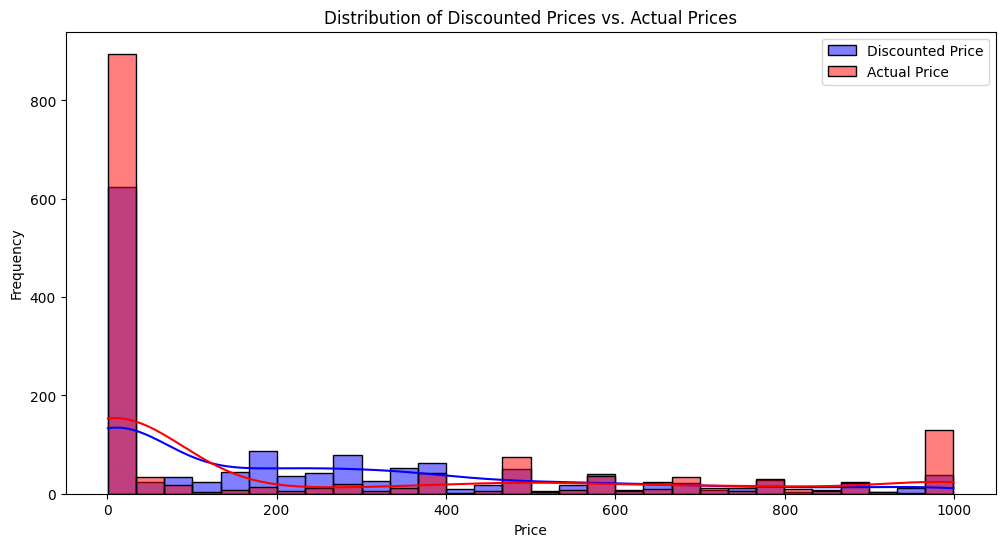

In [6]:
# Remove any non-numeric characters from 'discounted_price' and 'actual_price' and convert to float

df['discounted_price'] = df['discounted_price'].str.extract('(\d+)').astype(float)
df['actual_price'] = df['actual_price'].str.extract('(\d+)').astype(float)

# Plot the distribution of discounted prices vs. actual prices
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True, bins=30)
sns.histplot(df['actual_price'], color='red', label='Actual Price', kde=True, bins=30)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Q2) Spotify Data**

This code snippet loads a Spotify dataset and creates a histogram to visualize the distribution of track popularity

Saving spotify.csv to spotify.csv


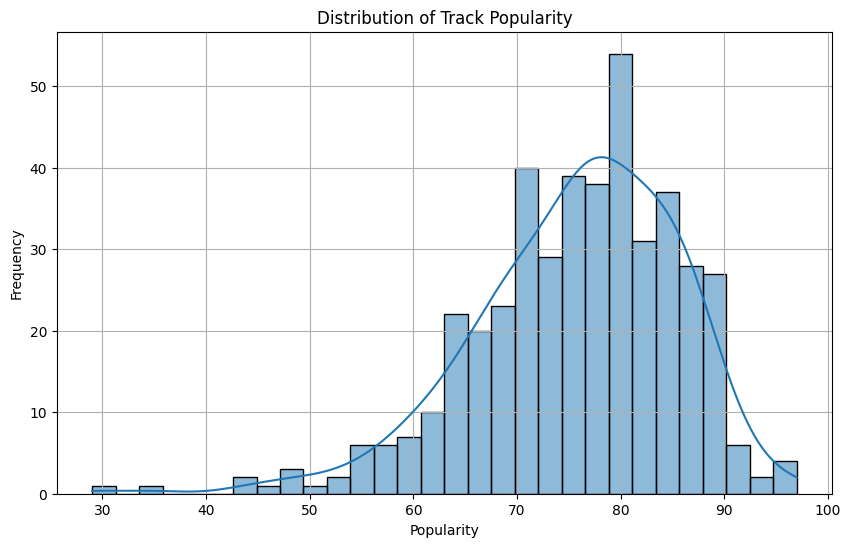

In [7]:
# Load the Spotify dataset and visualize the distribution of popularity among the tracks using a histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files

uploaded = files.upload()

spotify_df = pd.read_csv('spotify.csv')

# Plot the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram shows the distribution of track popularity in the dataset, which helps us understand how popularity is spread across different tracks. Now, let's move on to the next question to explore the relationship between popularity and track duration using a scatter plot.

This code snippet creates a scatter plot to visualize the relationship between the duration of tracks and their popularity using the Spotify dataset.

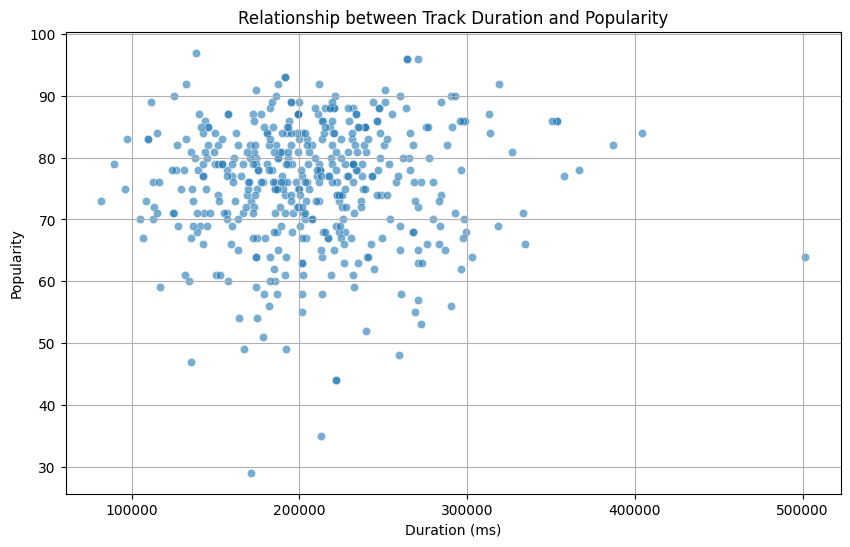

In [8]:
# Explore the relationship between popularity and duration of tracks using a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title('Relationship between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

This code snippet creates a horizontal countplot to display the number of tracks for each artist in the Spotify dataset.

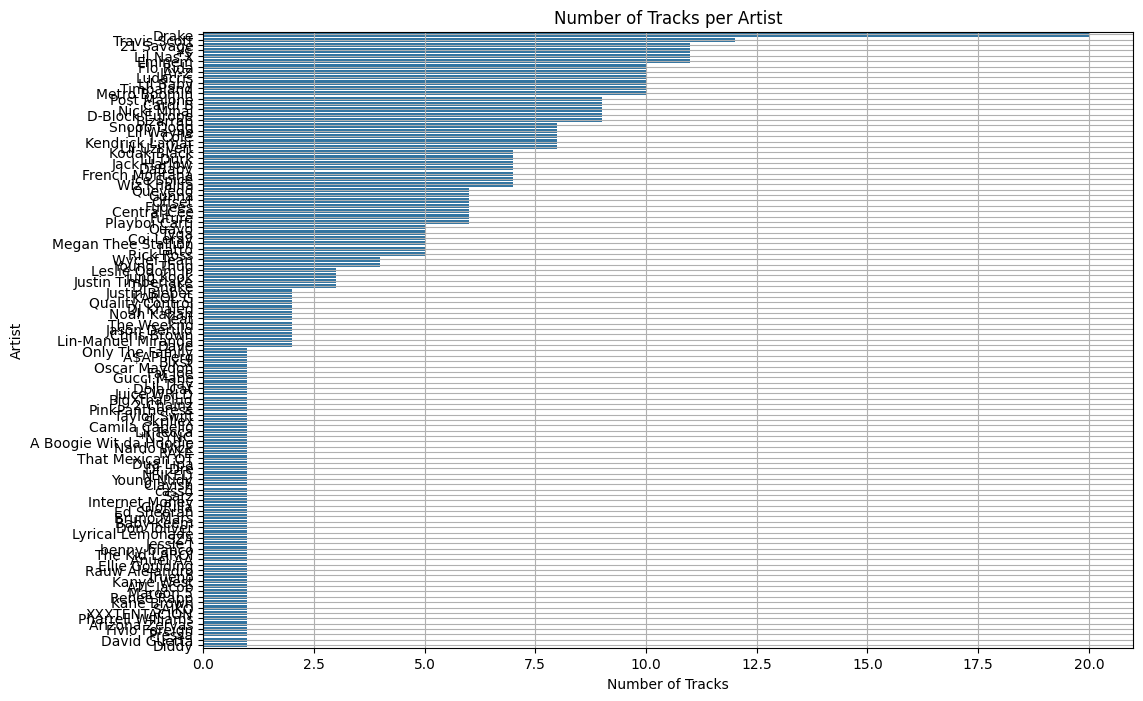

In [9]:
# Identify the artist with the highest number of tracks and visualize the count of tracks for each artist using a countplot

plt.figure(figsize=(12, 8))
# Countplot for the number of tracks per artist
sns.countplot(y='Artist', data=spotify_df, order=spotify_df['Artist'].value_counts().index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.grid(True)
plt.show()

This code snippet sorts a DataFrame by track popularity in ascending order and selects the artist name, track name, and popularity for the five least popular tracks.

In [10]:
# Identify the top 5 least popular tracks and provide the artist name and track name for each

# Sort the dataframe by popularity in ascending order
least_popular_tracks = spotify_df.sort_values(by='Popularity').head(5)

# Select relevant columns
least_popular_tracks_info = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

print(least_popular_tracks_info)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
